Лабораторная работа #6
======================

Имеется датасет, содержащий 3 непрерывных предиктивных переменные, и одну целевую переменную (задача 
регрессии).

Необходимо построить модель множественной линейной регресии, определить параметры модели, исследовать выполнение 
свойств модели. 

Уровень значимости в статистических критериях принять равным 0,05.
    
Итоговый файл **Jupyter Notebook** должен содержать полное решение задач, в том числе: 

* уравнение построенной линейной модели;
* графики совместных распределений предикторов и целевой переменной (на графики также нанести линию, соответствующую уравнению построенной линейной модели);
* график распределения остатков модели;
* проверка нормальности распределения остатков (с формулировкой вывода на основе критерия);
* проверка отсутствия систематической ошибки (с формулировкой вывода на основе критерия; использовать критерий Стьюдента для одной выборки);
* графики совместных распределений предикторов и эмпирических значений целевой переменной против остатков;
* проверка отсутствия линейной зависимости между всеми предикторами и остатками (с формулировкой вывода на основе критерия);
* проверка отсутствия линейной зависимости между эмпирическими значениями целевой переменной и остатками (с формулировкой вывода на основе критерия);
* вычислить коэффициент детерминации модели;
* вычислить несмещенный коэффициент детерминации модели.

Студенты НИ реализуют вычисление параметров регрессионной модели самостоятельно, методом наименьших квадратов. В качестве критериев проверки линейной зависимости использовать реализованные ранее критерии Спирмена/Кендалла.

PS: эмпирическое значение целевой переменной - значение y, вычисленное для заданного набора параметров X с использованием построенной линейной модели (вместо фактического значения, заданного по условию).


уравнение построенной линейной модели:
$$ x = \theta_1 + h_k \theta_2 + E_k$$
где {hk} - наблюдения

или (более привычный для меня вариант):
$$ y_i = w_0 + w_1*x_i + \epsilon_i$$

в матричном виде:
$$ y = WX + E $$

матрицу параметров(W):
$$W = (X^T X)^{-1} X^Ty$$

In [1]:
!pip install sklearn

In [2]:
from pathlib import Path
from typing import List, Tuple

import pandas as pd
import numpy as np
from scipy import stats
from sklearn.linear_model import LinearRegression

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns; sns.set()

ROOT_PATH = Path(".")
alpha = 0.05

In [3]:
data_path = ROOT_PATH / '..' / 'data' / 'lw6' / 'projects' / '1032173841'
data_path = data_path.resolve()

df = pd.read_csv(data_path/'task.csv')
df

,x1,x2,x3,y
0,158.988784,-85.841379,17.138690,423.909011
1,125.958011,-24.878022,13.218044,320.105911
2,147.855769,-24.768728,6.782890,782.221805
3,118.055524,-30.056958,14.711590,727.600969
4,170.678001,-20.073177,14.334704,1096.215173
...,...,...,...,...
95,79.163114,-105.464052,5.920676,-407.922557
96,119.307847,-28.809783,11.144945,478.166866
97,138.962268,-56.677041,5.680922,581.113221
98,124.060416,-120.712378,1.813663,-384.584353


In [4]:
x = df[["x1", "x2", "x3"]].values

x1 = df[["x1"]].values.ravel()
x1_argmin = x1.argmin()
x1_argmax = x1.argmax()
x1_minimax = np.array([x1.min(), x1.max()])

x2 = df[["x2"]].values.ravel()
x2_argmin = x2.argmin()
x2_argmax = x2.argmax()
x2_minimax = np.array([x2.min(), x2.max()])

x3 = df[["x3"]].values.ravel()
x3_argmin = x3.argmin()
x3_argmax = x3.argmax()
x3_minimax = np.array([x3.min(), x3.max()])

y = df[["y"]].values.ravel()

In [5]:
def model(x, y):
    """функцию, которая находит уравнение линейной регрессии"""
    x = np.array(x)
    y = np.array(y)
    
    x = np.column_stack((x, np.ones(x.shape[0])))
    W_inverted = np.linalg.inv(x.T @ x)
    model = W_inverted @ x.T @ y
    model = model.ravel()
    return model[:-1], model[-1]

m = LinearRegression()
m.fit(x, y)

weights, intercept = model(x, y)

print(weights, intercept)
print(m.coef_, m.intercept_)

[4.18757424 7.4385328  4.9554564 ] 39.03566133393714
[4.18757424 7.4385328  4.9554564 ] 39.03566133393707


In [6]:
y_pred = x @ weights + intercept
y_alt_pred = m.predict(x)
y_pred.all() == y_alt_pred.all()

True

графики совместных распределений x[1, 2, 3] (предикторов) и y (целевой переменной) с уравнением модели(зелёная линия - реализованная мной, красные точки(плюсы) - реализация из scipy)

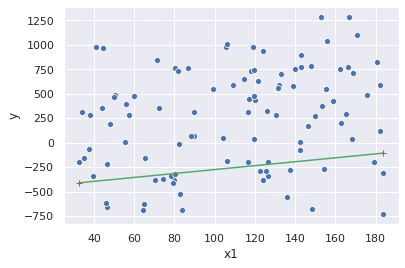

In [7]:
sns.scatterplot(x1, y)
plt.plot(x1_minimax, y_pred[[x1_argmin, x1_argmax]], 'g')
plt.plot(x1_minimax, y_alt_pred[[x1_argmin, x1_argmax]], 'r+')
plt.xlabel('x1')
plt.ylabel('y')
plt.show()

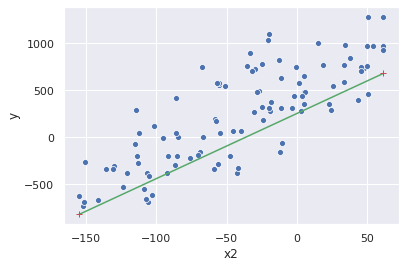

In [8]:
sns.scatterplot(x2, y)
plt.plot(x2_minimax, y_pred[[x2_argmin, x2_argmax]], 'g')
plt.plot(x2_minimax, y_alt_pred[[x2_argmin, x2_argmax]], 'r+')
plt.xlabel('x2')
plt.ylabel('y')
plt.show()

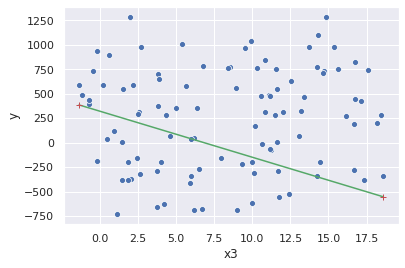

In [9]:
sns.scatterplot(x3, y)
plt.plot(x3_minimax, y_pred[[x3_argmin, x3_argmax]], 'g')
plt.plot(x3_minimax, y_alt_pred[[x3_argmin, x3_argmax]], 'r+')
plt.xlabel('x3')
plt.ylabel('y')
plt.show()

график распределения остатков модели

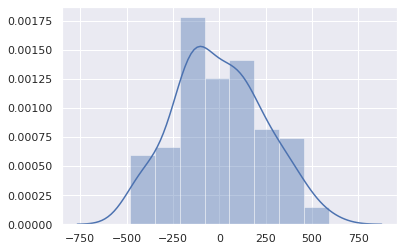

In [10]:
dy = y - y_pred
sns.distplot(dy)

проверка остатков на нормальность

In [11]:
_, p_shapiro = stats.shapiro(dy)
# print(f"{p_shapiro=}")
if p_shapiro >= alpha:
    h_shapiro = 0
    print("confirm H0")
else:
    h_shapiro = 3
    print("reject H0")

confirm H0


остатки имеют нормальное распределение

проверка отсутствия систематической ошибки с помощью критерия Стьюдента

In [12]:
_, p_samp = stats.ttest_1samp(dy, 0)
# print(f"{p_samp=}")
if p_samp >= alpha:
    h_samp = 0
    print("confirm H0")
else:
    h_samp = 1
    print("reject H0")

confirm H0


подтверждение нулевой гипотезы -> систематическая ошибка отсутствует

графики совместных распределений предикторов и эмпирических значений целевой переменной против остатков

Text(0, 0.5, 'остатки')

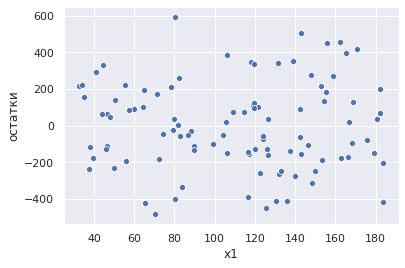

In [13]:
sns.scatterplot(x1, dy)
plt.xlabel("x1")
plt.ylabel("остатки")

Text(0, 0.5, 'остатки')

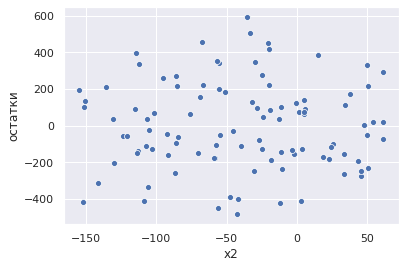

In [14]:
sns.scatterplot(x2, dy)
plt.xlabel("x2")
plt.ylabel("остатки")

Text(0, 0.5, 'остатки')

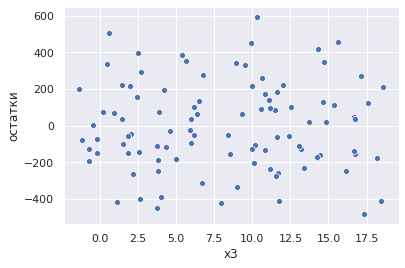

In [15]:
sns.scatterplot(x3, dy)
plt.xlabel("x3")
plt.ylabel("остатки")

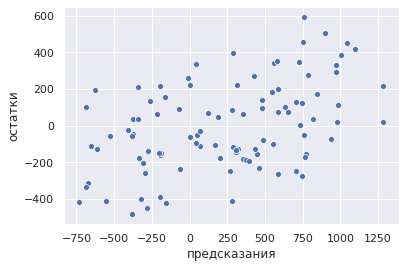

In [16]:
sns.scatterplot(y, dy)
plt.xlabel("предсказания")
plt.ylabel("остатки")
plt.show()

проверка отсутствия линейной зависимости между всеми предикторами и остатками

In [17]:
def spearman(x, y):
    x = np.array(x)
    y = np.array(y)
    n = x.size
    
    x_ranked = stats.rankdata(x) #R
    y_ranked = stats.rankdata(y) #S
    
    r = np.sum((
        (x_ranked - x_ranked.mean()) * (y_ranked - y_ranked.mean()) /
    #   --------------------------------
        np.sqrt( np.sum((x_ranked - x_ranked.mean()) ** 2) * np.sum((y_ranked - y_ranked.mean()) ** 2))
    ))
    
    stat = np.sqrt(n - 2) * r / np.sqrt(1 - r ** 2)
    p = 2 * min(stats.t.cdf(stat, n - 2), 1 - stats.t.cdf(stat, n - 2))
    
    return stat, p

print(spearman(x1, dy))
print(stats.spearmanr(x1, dy))

(-0.25218774047313713, 0.8014241039349217)
SpearmanrResult(correlation=-0.025466546654665464, pvalue=0.8014241039349217)


In [18]:
_, p_spearman_x1 = spearman(x1, dy)
_, p_spearman_x2 = spearman(x1, dy)
_, p_spearman_x3 = spearman(x1, dy)
if (p_spearman_x1 > alpha) and (p_spearman_x2 > alpha) and (p_spearman_x3 > alpha):
    print("all h0 are confirmed")
else:
    print("not all h0 are confirmed")

all h0 are confirmed


все нулевый гипотезы подтвердились, следовательно между всеми предикторами и остатками отсутствует линейная зависимость

проверка отсутствия линейной зависимости между эмпирическими значениями целевой переменной и остатками

In [19]:
_, p_spearman_y_pred = spearman(y_pred, dy)
if p_spearman_y_pred > alpha:
    print("h0 confirmed")
else:
    print("h0 rejected")

h0 confirmed


нулевая гипотезы подтвердились, следовательно между эмпирическими значениями целевой переменной и остатками отсутствует линейная зависимость

вычислить коэффициент детерминации модели

вычислить несмещенный коэффициент детерминации модели

p = 4 потому, что 3 предиктора + 1 константа

In [20]:
def deter(y_true, y_pred, p):
    assert y_pred.size == y_true.size
    n = y_pred.size
    dy = y_true - y_pred
    R_sqrt = 1 - np.sum(dy * dy) / np.sum((y - y.mean()) * (y - y.mean()))
    R_sqrt_adj = 1 - (n - 1) / (n - p) * np.sum(dy * dy) / np.sum((y - y.mean()) * (y - y.mean()))
    return R_sqrt, R_sqrt_adj

r, r_adj = deter(y, y_pred, 4)
r, r_adj

(0.7866392406313074, 0.7799717169010357)

коэффициент детерменации = 0.7866392406313074

несмещенный коэффициент детерменации = 0.7799717169010357